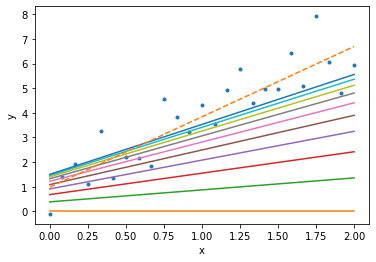

In [61]:
#!/usr/bin/python3.7
#GD_LinearRegression.ipynb
#Parth Parakh
#purpose: this file shows a simple example of how gradient descent works in a one-dimensional linear regression problem
#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#---------------------------------------------------------------------
def myLinearRegression_basic(y,X,alpha,tol):
    N=len(X);                    #number of samples
    p=len(X[0]);                    #number of parameters (it includes the intercept)
    beta=np.zeros((p,1));                  #parameters
    err=1.0;
    iteration=1;
    while (err>tol) : 
        a = (np.dot(X,beta)-y);
        a_T = np.transpose(a);
        J= np.dot(a_T,a);                           #objective function (RSS/2)
        gradient = 2*(np.dot(a_T,X)).transpose();       # gradient of J
        beta = beta-(alpha/N)*gradient;         #taking a step along the gradient
        a = (np.dot(X,beta)-y);
        a_T = np.transpose(a);
        err=np.abs(J-np.dot(a_T,a));                     #computing the change in J
        print(err)
        iteration=iteration+1;
    return beta, iteration;

def myLinearRegressionLearning(y,X,alpha,tol):
    m=len(X); #number of samples
    n=len(X[0]); #number of parameters (it includes the intercept)
    theta=np.zeros((n,1)); #parameters
    err=1.0;
    iteration=1; 
    THETA=theta;
    x0=X[:,1];
    plt.plot(x0,y,'.');
    plt.xlabel('x');
    plt.ylabel('y');
    plt.plot(x0,theta[0]+theta[1]*x0);

    while (err>tol):
        a = np.dot(X,theta)-y;
        b = np.transpose(a);
        J=0.5*np.dot(b,a);
        gradient = (np.dot(b,X)).transpose();
        theta = theta-((alpha/m)*gradient);
        a = np.dot(X,theta)-y;
        b = np.transpose(a);
        res=theta;
        err=np.abs(J-0.5*(np.dot(b,a)))
        iteration=iteration+1;
        if(iteration<11):
            plt.plot(x0,theta[0]+theta[1]*x0);
            
    plt.plot(x0,theta[0]+theta[1]*x0,'--');
    
    return res, iteration;

if __name__ == "__main__":
    x=np.linspace(0,2,25);
    xT = x.transpose().reshape(25,1);
    one = np.ones((25,1));
    X=np.concatenate((one,xT),axis = 1);
    y =  1+ 3*x + np.random.standard_normal( (1,len(x)) );
    y=y.transpose();          

    alpha=0.1;
    tol=1e-10;
    #figure('name','alpha=0.1')
    res, iteration = myLinearRegressionLearning(y,X,alpha,tol);

    '''
    # too small learning rate makes convergence slow #
    alpha=1e-3;
    #figure('name','alpha=1e-3')
    res, iteration = myLinearRegressionLearning(y,X,alpha,tol);

    # too large learning rate prevents convergence (overshooting) #
    alpha=1.0;
    #figure('name','alpha=1.0')
    res, iteration = myLinearRegressionLearning(y,X,alpha,tol);
    '''
